# Goal) predict the price of a used car depending on its specifications

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

In [3]:
raw_data.describe(include='all')
# By default, we only get descriptives for numerical variables

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Notice: 
1) There are some missing values('Price' and 'EnginV'), looking at the count 

2) The unique entries for 'Model' is 312, which is hard to implement into regression that would mean more than 300 dummies.

3) 'top'- most common category. ALmost all of the entries of 'Registration' are 'Yes'. So it looks like this variable won't be useful

We will drop the variable 'Model'. we won't be losing too much variability.

### DataFrame.drop(columns, axis) - returns new object with the indicated columns dropped

#### axis 0 - raw, axis 1 - column

In [4]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()
# 'True' stands for missing values

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### Rule of thumb:

if you are removing <5% of the observations, you are free to just remove all that have missing values

In [6]:
data_no_mv = data.dropna(axis=0) # data without missing values

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

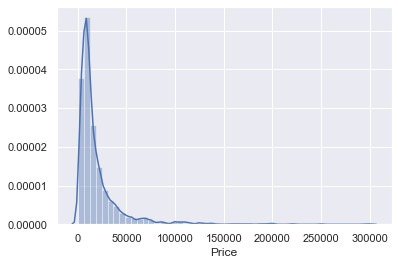

In [8]:
sns.distplot(data_no_mv['Price'])

#### We have a few outliners in 'Price', which will affect the regression dramatically

#### One way to deal with outliers is to remove top 1% of observations

### Dealing with outliers

### DataFrame.quantile(the quantile(0 to 1)) - returns the value at the given quantile(=np.precentile)

In [9]:
q = data_no_mv['Price'].quantile(0.99)

# new dataframe keeping only 99 percentiles of price
data_1 = data_no_mv[data_no_mv['Price']<q] 
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


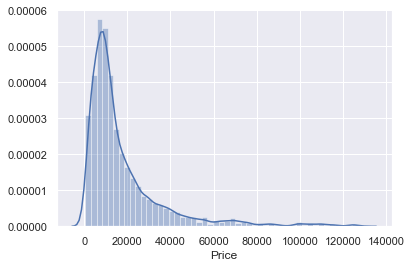

In [10]:
sns.distplot(data_1['Price'])

#### We have similar issues in 'Mileage','EngineV', and 'Year'.

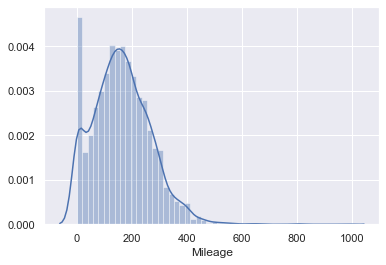

In [11]:
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

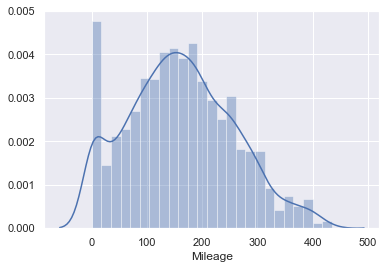

In [13]:
sns.distplot(data_2['Mileage'])

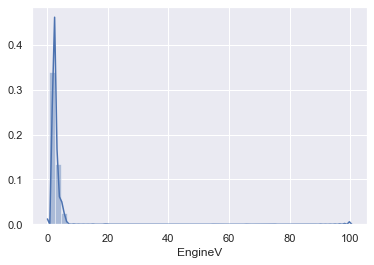

In [14]:
sns.distplot(data_no_mv['EngineV'])

In [15]:
EngV = pd.DataFrame(raw_data['EngineV'])
EngV = EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
2214,1.00
1996,1.00
2769,1.00
2508,1.00
2646,1.00


#### An interval where engine volume should normally fall is 0.6 to 6.5. There are some unusual values.

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]

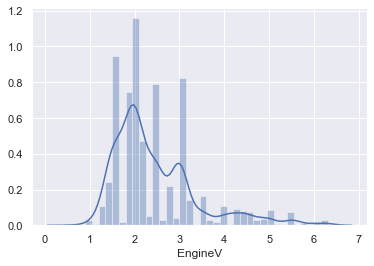

In [17]:
sns.distplot(data_3['EngineV'])

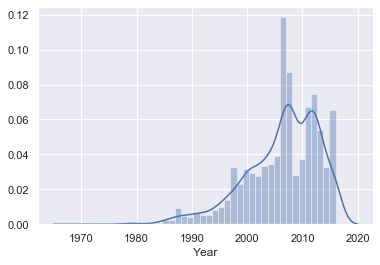

In [18]:
sns.distplot(data_no_mv['Year'])

#### Take the first percentile and keep all observations that are higher.

In [19]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

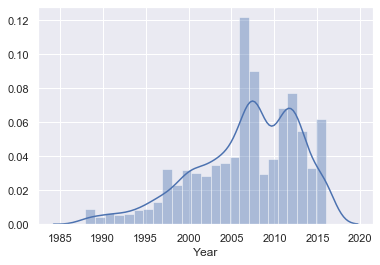

In [20]:
sns.distplot(data_4['Year'])

In [21]:
data_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999
10,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011
11,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994


#### Currently the indices refer to all the data, so we will reset the indices.

In [22]:
data_cleaned = data_4.reset_index(drop=True)
# drop=True - completely forget the old indices

In [23]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


***

## Checking the OLS assumptions

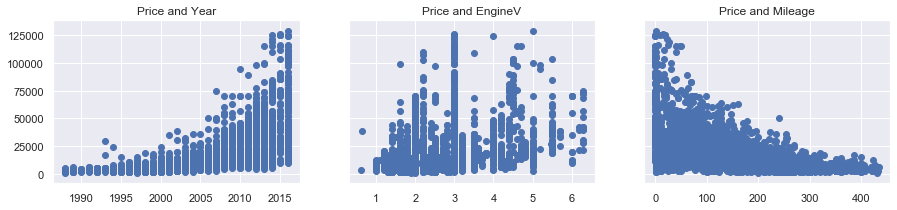

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

#### They are not linear, so we should not run linear regression.

#### We should fist transform one or more variables.

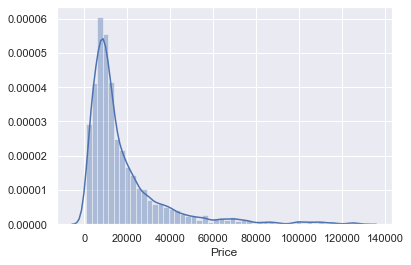

In [25]:
sns.distplot(data_cleaned['Price'])

#### The patterns are quite exponential. 

#### Log transformations are especially useful when facing exponential relationships.

### Relaxing the assumptions

In [26]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


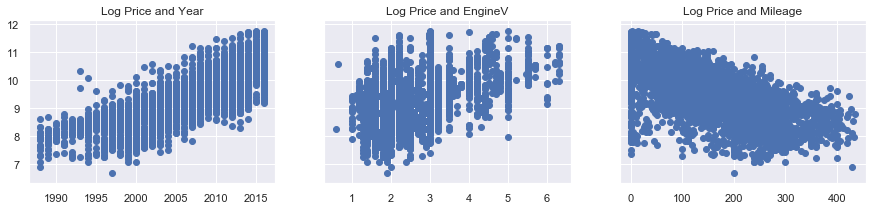

In [27]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [28]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

### Multicollinearity

In [29]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

#### It is logical that 'Year' and 'Mileage' will be correlated

#### One of the best ways to check for multicollinearity is through VIF (from statsmodels)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables= data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) 
              for i in range(variables.shape[1])] 
vif['features'] = variables.columns

In [31]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


#### VIF $\in$ [1, +$\infty$)

#### VIF = 1: No multicolinearity
#### 1 < VIF < 5 : Perfectly okay
#### (5,6,10,etc) < VIF: Unacceptable

#### From the table, 'Year' is definitely too correlated with other variables

#### We first drop the variable that has the highest VIF, and compare new VIF later.

In [32]:
# We will remove 'Year'
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

***

## Create dummy variables

### pd.get_dummies(df, drop_first) - spots all categorical variables and creates dummies automatically

#### If we have N categories for a feature, we have to create N-1 dummies.

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [34]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [35]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [36]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [37]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


***

***

#### Just for checking...

In [38]:
variables= data_preprocessed[data_preprocessed.columns.values]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) 
              for i in range(variables.shape[1])] 
vif['features'] = variables.columns
vif

,VIF,features
0,41.981260,log_price
1,4.460434,Mileage
2,13.445639,EngineV
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


#### 'log_price' has a very high VIF, which implies it is linearly correlated with other variables. But this is what we should expect since we are using a linear regression to determine 'log_price' given independent variables.

#### We should drop 'log_price' to check VIF because Multicollinearity assumptions refer only to the idea that the independent variables shoud not be collinear.

In [39]:
variables = data_preprocessed.drop(['log_price'], axis = 1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) 
              for i in range(variables.shape[1])] 
vif['features'] = variables.columns
vif

,VIF,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


The ones that have high VIF are 'EngineV' and 'Registration_yes'.

In Registration, **most of the variables are 'yes'**, so if we predict 'log_price', we are predicting registration. So we may **drop the 'Registration_yes'**.

If we create a new variable with dummies, **without dropping the first one**, what will happen?

In [40]:
data_with_dummies_new = pd.get_dummies(data_no_multicollinearity, drop_first=False)
data_with_dummies_new.head()

,Mileage,EngineV,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,8.342840,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,8.974618,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,9.495519,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,9.814656,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
variables = data_with_dummies_new.drop(['log_price'], axis = 1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) 
              for i in range(variables.shape[1])] 
vif['features'] = variables.columns
vif

/Users/ayumi.matsuoka/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,1.266554,Mileage
1,1.575735,EngineV
2,inf,Brand_Audi
3,inf,Brand_BMW
4,inf,Brand_Mercedes-Benz
5,inf,Brand_Mitsubishi
6,inf,Brand_Renault
7,inf,Brand_Toyota
8,inf,Brand_Volkswagen
9,inf,Body_crossover


Most VIFS are equal to **inf**.

**Reason:** When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. By including all dummies have introduced multicollinearity (**perfect multicollinearity**).

If we run a regression including all these dummies, the coefficients would be inflated and completely off-mark. That's why we need to **drop one of the dummy variables**.

***

## Linear regression model

In [42]:
# 'log price' is the dependent variable.
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets,
                                                   test_size=0.2, random_state=365)

### Create the regression

In [46]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In fact, this is a **log-linear regression** as the dependent variable is the log of **'Price'**.

In [47]:
y_hat = reg.predict(x_train)
# This is the values that our model predicts based on 'x_train'

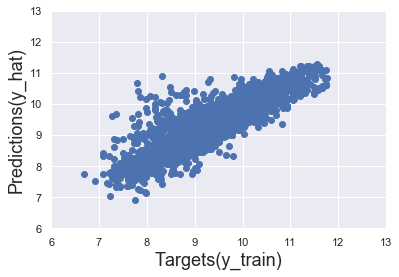

In [48]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets(y_train)', size=18)
plt.ylabel('Predictions(y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

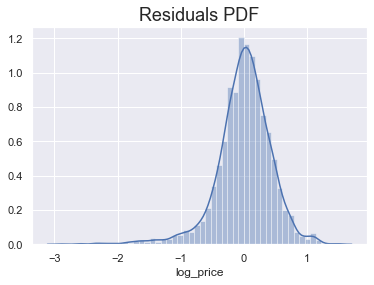

In [49]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF', size=18)

#### The residuals are the estimates of the erros.

Looks like it is **normally distributed** and the mean is **zero**.

In [50]:
reg.score(x_train, y_train)

0.744996578792662

Our model is explained in **75%** of the variability of the data.

### Finding the weights and bias

In [51]:
reg.intercept_

9.415239458021299

In [52]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [53]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


#### Weights Interpretation

#### I. Continuous Variables

1) A **positive weight** shows that as a feature **increases** in value, **so do the 'log_price' and 'Price'** respectively.

2) A **negative weight** shows that as s feature **increases** in value, 'log_price' and 'Price' **decrease**.

**Ex)** The more a car is being driven('Mileage' is high), the lower the price gets.

#### II. Dummies

1) A **positive weight** shows that the respective category(Brand) is **more expensive than the benchmark**(Audi)

**Ex)** the weight of BMV is positive, so on average, it is more expensive than Audi

In [54]:
data_cleaned['Brand'].unique()
# This shows the benchmark for 'Brand' is Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [55]:
data_cleaned['Body'].unique()
# The benchmark is 'crossover'

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [56]:
data_cleaned['Engine Type'].unique()
# The benchmark is 'Diesel'

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [59]:
data_cleaned['Registration'].unique()
# The benchmark is 'no'

array(['yes', 'no'], dtype=object)

### The bigger the weight, the bigger the impact!

Mileage(0.449) is twice more important than EngineV(0.209)

#### It doesn't make sense to compare continuous variables with dummies.

**Dummies** are only compared to their **respective benchmark**.

***

## Testing

In [60]:
y_hat_test = reg.predict(x_test)

**plt.scatter(x,y, alpha)** - creates a scatter plot and **alpha** specifies the opacity

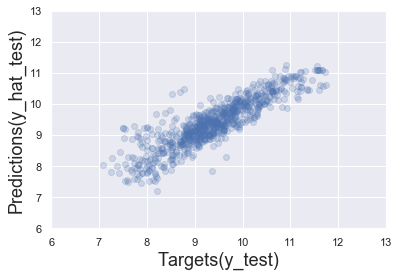

In [62]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)', size=18)
plt.ylabel('Predictions(y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

#### The more saturated the color, the higher the concentration

In [67]:
# dataframe for performance
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280


There are the predictions for the **log prices**

If we take the **exponentials** of the log prices, we will reach the **original prices**.

In [75]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [76]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0


The issue occurs because 'y_test' includes **indices**, and Pandas tried to match the indices.

In [77]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [79]:
df_pf['Target'] = np.exp(y_test)
df_pf.head(10)

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [80]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [82]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
5,21289.799394,20000.0,-1289.799394,6.448997
6,20159.189144,38888.0,18728.810856,48.160900
7,20349.617702,16999.0,-3350.617702,19.710675
8,11581.537864,12500.0,918.462136,7.347697
9,33614.617349,41000.0,7385.382651,18.013128


In [83]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


#### The max of the difference is off values.

In [89]:
#pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%']).tail(50)

,Prediction,Target,Residual,Difference%
166,15292.10,8300.00,-6992.10,84.24
67,7621.25,4100.00,-3521.25,85.88
432,2975.40,1600.00,-1375.40,85.96
550,14915.98,7900.00,-7015.98,88.81
208,5716.14,3000.00,-2716.14,90.54
116,15819.50,8300.00,-7519.50,90.60
366,13420.15,6999.00,-6421.15,91.74
686,23576.99,12000.00,-11576.99,96.47
404,8648.80,4400.00,-4248.80,96.56
30,15559.43,7900.00,-7659.43,96.95


**Notice:** the observed prices(targets) are extremely low when the predictions are dramatically far off.

## How to improve our model

1) Use a different set of variables(including Model?).

2) Remove a bigger part of the outliers

3) Use a different kind of transformations